In [34]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
from scipy import stats
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn import metrics
import re
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
from scipy.io import loadmat
import os
import utils
from scipy.optimize import fmin_cg
import scipy.io as si

# Support Vector Machines
## Exersize 1 
## (Linear separation)
## Investigate how the C values penalties parameters (low values penalties more and high values penalties less)

In [35]:
mydata = loadmat('data/ex6data1.mat')

In [36]:
Cols=['a0','a1']
X = pd.DataFrame(mydata['X'],columns=Cols)
Cols=['y']
y = pd.DataFrame(mydata['y'],columns=Cols)

In [37]:
X

,a0,a1
0,1.964300,4.5957
1,2.275300,3.8589
2,2.978100,4.5651
3,2.932000,3.5519
4,3.577200,2.8560
5,4.015000,3.1937
6,3.381400,3.4291
7,3.911300,4.1761
8,2.782200,4.0431
9,2.551800,4.6162


In [38]:
#eigher  X.join(y) or concat
data = pd.concat([X, y], axis=1)
data

,a0,a1,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


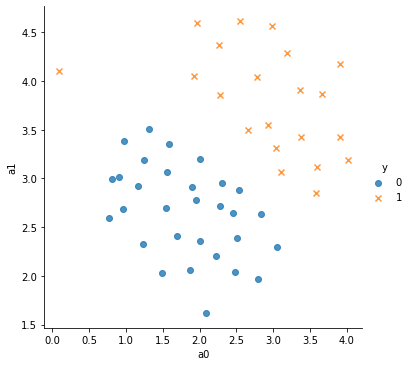

In [39]:
sns.lmplot(x="a0",y="a1",hue="y",data=data,fit_reg=False,markers=["o", "x"])


In [40]:

def plotData(X, y):
    
    sns.lmplot(x="a0",y="a1",hue="y",data=data,fit_reg=False,markers=["o", "x"])

In [41]:
def visualizeBoundary(X, y, model):
    plotData(X, y)
    
    x1 = np.linspace(X['a0'].min(), X['a0'].max(), 100)
    x2 = np.linspace(X['a1'].min(), X['a1'].max(), 100)
    #np.meshgrid return coordinate matrices from coordinate vectors.
    X1, X2 = np.meshgrid(x1, x2)
    vals = np.zeros(X2.shape)
    
    for i in range(100):
        #Stack arrays in sequence vertically (row wise).
        D = np.vstack((X1[:,i], X2[:,i])).T
        vals[:, i] = model.predict(D)
        
    plt.contour(X1, X2, vals, [0,0])

In [42]:
x1 = np.linspace(X['a0'].min(), X['a0'].max(), 100)
x2 = np.linspace(X['a1'].min(), X['a1'].max(), 100)
x1

array([0.086405  , 0.12608778, 0.16577056, 0.20545333, 0.24513611,
       0.28481889, 0.32450167, 0.36418444, 0.40386722, 0.44355   ,
       0.48323278, 0.52291556, 0.56259833, 0.60228111, 0.64196389,
       0.68164667, 0.72132944, 0.76101222, 0.800695  , 0.84037778,
       0.88006056, 0.91974333, 0.95942611, 0.99910889, 1.03879167,
       1.07847444, 1.11815722, 1.15784   , 1.19752278, 1.23720556,
       1.27688833, 1.31657111, 1.35625389, 1.39593667, 1.43561944,
       1.47530222, 1.514985  , 1.55466778, 1.59435056, 1.63403333,
       1.67371611, 1.71339889, 1.75308167, 1.79276444, 1.83244722,
       1.87213   , 1.91181278, 1.95149556, 1.99117833, 2.03086111,
       2.07054389, 2.11022667, 2.14990944, 2.18959222, 2.229275  ,
       2.26895778, 2.30864056, 2.34832333, 2.38800611, 2.42768889,
       2.46737167, 2.50705444, 2.54673722, 2.58642   , 2.62610278,
       2.66578556, 2.70546833, 2.74515111, 2.78483389, 2.82451667,
       2.86419944, 2.90388222, 2.943565  , 2.98324778, 3.02293

In [43]:
x2

array([1.6177    , 1.64798788, 1.67827576, 1.70856364, 1.73885152,
       1.76913939, 1.79942727, 1.82971515, 1.86000303, 1.89029091,
       1.92057879, 1.95086667, 1.98115455, 2.01144242, 2.0417303 ,
       2.07201818, 2.10230606, 2.13259394, 2.16288182, 2.1931697 ,
       2.22345758, 2.25374545, 2.28403333, 2.31432121, 2.34460909,
       2.37489697, 2.40518485, 2.43547273, 2.46576061, 2.49604848,
       2.52633636, 2.55662424, 2.58691212, 2.6172    , 2.64748788,
       2.67777576, 2.70806364, 2.73835152, 2.76863939, 2.79892727,
       2.82921515, 2.85950303, 2.88979091, 2.92007879, 2.95036667,
       2.98065455, 3.01094242, 3.0412303 , 3.07151818, 3.10180606,
       3.13209394, 3.16238182, 3.1926697 , 3.22295758, 3.25324545,
       3.28353333, 3.31382121, 3.34410909, 3.37439697, 3.40468485,
       3.43497273, 3.46526061, 3.49554848, 3.52583636, 3.55612424,
       3.58641212, 3.6167    , 3.64698788, 3.67727576, 3.70756364,
       3.73785152, 3.76813939, 3.79842727, 3.82871515, 3.85900

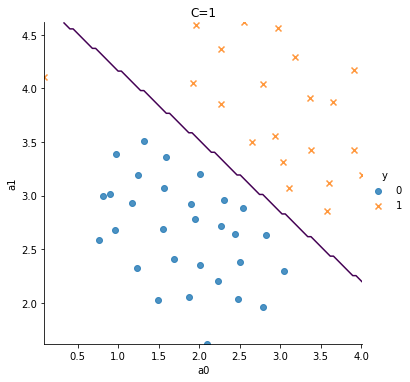

In [44]:
# Train SVM with different C values

C = 1.0
model = SVC(C=C, kernel='linear')
model.fit(X, y) 

visualizeBoundary(X, y, model)
plt.title('C=1')
plt.show()

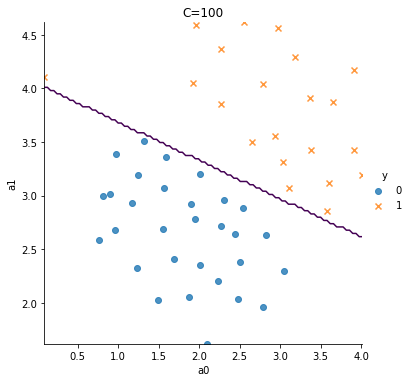

In [45]:
C = 100.0
model = SVC(C=C, kernel='linear')
model.fit(X, y) 

visualizeBoundary(X, y, model)
plt.title('C=100')
plt.show()

#  Gaussian Kernel
### Exersize 2
## (Nonlinear separation)

In [46]:
mydata = loadmat('data/ex6data2.mat')

In [47]:
Cols=['a0','a1']
X = pd.DataFrame(mydata['X'],columns=Cols)
Cols=['y']
y = pd.DataFrame(mydata['y'],columns=Cols)

In [48]:
X

,a0,a1
0,0.107143,0.603070
1,0.093318,0.649854
2,0.097926,0.705409
3,0.155530,0.784357
4,0.210829,0.866228
...,...,...
858,0.994240,0.516667
859,0.964286,0.472807
860,0.975806,0.439474
861,0.989631,0.425439


In [49]:
#eigher  X.join(y) or concat
data = pd.concat([X, y], axis=1)
data 

,a0,a1,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


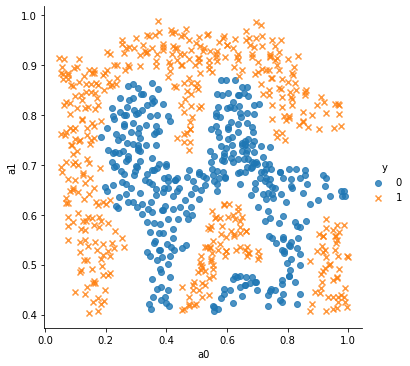

In [50]:
sns.lmplot(x="a0",y="a1",hue="y",data=data,fit_reg=False,markers=["o", "x"])


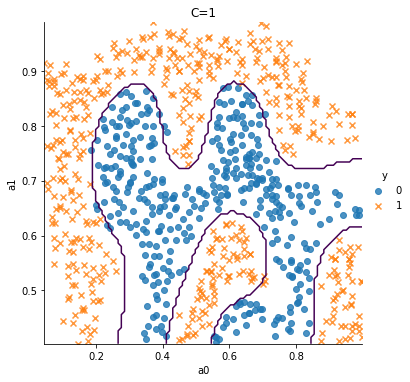

In [51]:
# Train SVM with different C values
sigma =0.1
gamma = 1 / (2 * sigma**2)
C = 1.0
model =  SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y) 

visualizeBoundary(X, y, model)
plt.title('C=1')
plt.show()

### Exersize 3
## Obtain best values for penalty parameter and sigma (Kernel parameter from Boltman function)
## First from choosing some sigma and C
## Second from search grid

In [52]:
mydata = loadmat('data/ex6data3.mat')

In [53]:
Cols=['a0','a1']
X = pd.DataFrame(mydata['X'],columns=Cols)
Cols=['y']
y = pd.DataFrame(mydata['y'],columns=Cols)

In [54]:
X

,a0,a1
0,-0.158986,0.423977
1,-0.347926,0.470760
2,-0.504608,0.353801
3,-0.596774,0.114035
4,-0.518433,-0.172515
...,...,...
206,-0.399885,-0.621930
207,-0.124078,-0.126608
208,-0.316935,-0.228947
209,-0.294124,-0.134795


In [55]:
#eigher  X.join(y) or concat
data = pd.concat([X, y], axis=1)
data 

,a0,a1,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1
...,...,...,...
206,-0.399885,-0.621930,1
207,-0.124078,-0.126608,1
208,-0.316935,-0.228947,1
209,-0.294124,-0.134795,0


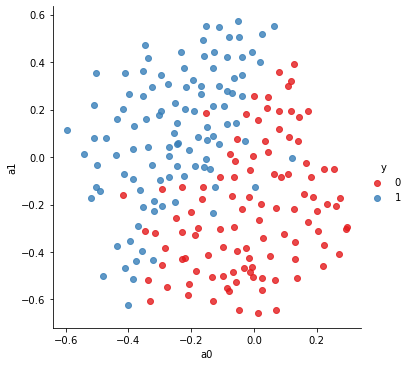

In [56]:
sns.lmplot(x="a0",y="a1",hue="y",data=data,fit_reg=False,palette="Set1")

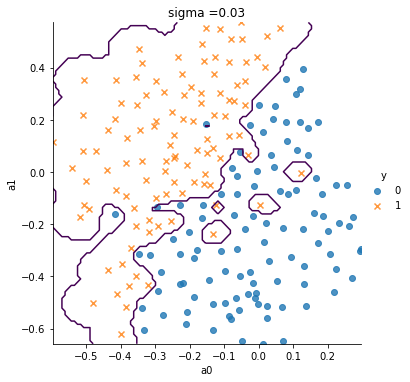

In [57]:
# Train SVM with different sigma values
#overfit
sigma =0.03
gamma = 1 / (2 * sigma**2)
C = 1
model =  SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y) 

visualizeBoundary(X, y, model)
plt.title('sigma =0.03')
plt.show()

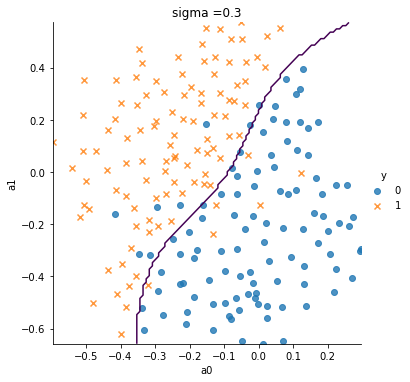

In [58]:
# Train SVM with different sigma values
sigma =0.3
gamma = 1 / (2 * sigma**2)
C = 1.0
model =  SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y) 

visualizeBoundary(X, y, model)
plt.title('sigma =0.3')
plt.show()

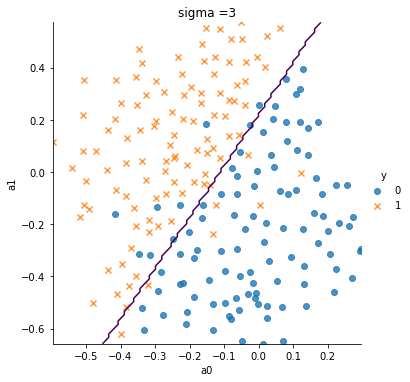

In [59]:
# Train SVM with different sigma values
#underfit
sigma =3
gamma = 1 / (2 * sigma**2)
C = 100.0
model =  SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y) 

visualizeBoundary(X, y, model)
plt.title('sigma =3')
plt.show()

In [60]:
#the cross validation data is given in the datafile, Xval, yval
mydata = loadmat('data/ex6data3.mat')
Xval =mydata['Xval']
#flatten() function flattens a matrix to one dimension
yval =mydata['yval'].flatten()
yval

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0], dtype=uint8)

In [61]:
Cval = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigmaval = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
#For example, if you try each of the 8 values listed above for C and for sigma**2, you would end up training and evaluating (on the cross validation
#set) a total of 82 = 64 different models.

N= np.zeros((len(Cval)**2, 3))
ct = 0
for i, C in enumerate(Cval):
    for j, sigma in enumerate(sigmaval):
        gamma = 1 / (2 *( sigma**2))
        
        # train SVM with gaussian kernel
        model = SVC(C=C, kernel='rbf', gamma=gamma)
        model.fit(X, y) 
        
        # predict with cross-validation set
        p = model.predict(Xval)
        
        N[ct, :] = C, sigma, np.mean(p!=yval)
        
        ct += 1
        

In [62]:
np.mean(p!=yval)

0.26

In [63]:
N[:,2]

array([0.565, 0.565, 0.565, 0.565, 0.565, 0.565, 0.565, 0.565, 0.565,
       0.565, 0.55 , 0.14 , 0.38 , 0.565, 0.565, 0.565, 0.565, 0.565,
       0.055, 0.09 , 0.175, 0.565, 0.565, 0.565, 0.565, 0.245, 0.04 ,
       0.075, 0.11 , 0.26 , 0.565, 0.565, 0.395, 0.095, 0.035, 0.035,
       0.075, 0.155, 0.565, 0.565, 0.38 , 0.11 , 0.035, 0.055, 0.07 ,
       0.11 , 0.28 , 0.565, 0.38 , 0.11 , 0.06 , 0.045, 0.065, 0.08 ,
       0.155, 0.565, 0.38 , 0.11 , 0.06 , 0.04 , 0.075, 0.075, 0.11 ,
       0.26 ])

In [64]:
N[:,2].shape

(64,)

In [65]:
ind = np.argmin(N[:,2])
ind

34

1.0 0.1
0.035


Text(0.5, 1.0, 'C=1.000000')

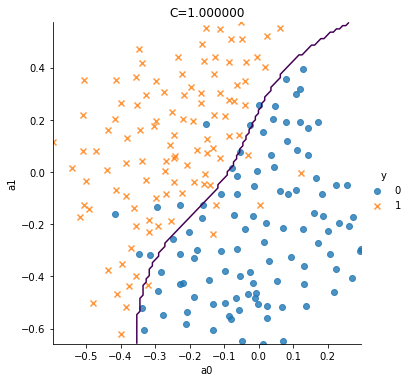

In [66]:
# np.argmin Returns the indices of the minimum values along an axis.
ind = np.argmin(N[:,2])
C, sigma = N[ind,0], N[ind,1]
print(C, sigma)

sigma = 0.3

gamma = 1 / (2 * sigma**2)

# train SVM with gaussian kernel
model = SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y) 

p = model.predict(Xval)
print(np.mean(p!=yval))

visualizeBoundary(X, y, model)
plt.title('C=%f'%C)

In [67]:
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [68]:
grid_parameter={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [69]:
grid=GridSearchCV(SVC(),grid_parameter,verbose=3)

In [70]:
grid.fit(Xval,yval)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.825, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.800, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.900, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.575, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.550, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.550, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=1.000, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.900, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.875, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.975, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.925, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [71]:
grid.best_params_

{'C': 100, 'gamma': 1}

In [72]:
grid.best_estimator_

SVC(C=100, gamma=1)

0.065


Text(0.5, 1.0, 'C=100.000000')

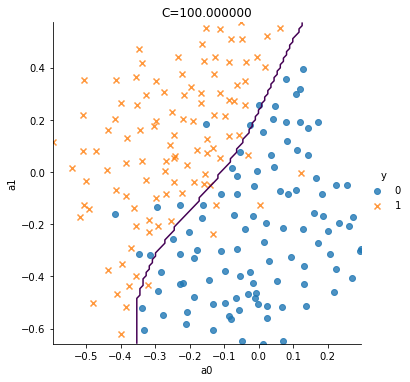

In [73]:
C=100


gamma = 1

# train SVM with gaussian kernel
model = SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y) 

p = model.predict(Xval)
print(np.mean(p!=yval))

visualizeBoundary(X, y, model)
plt.title('C=%f'%C)